<a href="https://colab.research.google.com/github/chaitanyaa1512/Machine-Learning/blob/main/ML_LAB_10_T3_46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [ ]:
# Load the dataset
df = pd.read_csv("train.csv")
df.head()
df.shape
df.columns
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Preparing Data into Input Feature and Output Target Class
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Model 1 - Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
# Model 2 - K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range=list(range(1,31))
pow = [1,2]
weight_options=['uniform','distance']
param_grid = dict(n_neighbors=k_range,weights=weight_options,p = pow)
grid_k = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid_k.fit(X_train, y_train)

print("Tuned Hyperparameters :", grid_k.best_params_)
print("Accuracy :",grid_k.best_score_)


Tuned Hyperparameters : {'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Accuracy : 0.674


In [ ]:
# Model 3 - Support Vector Machine (SVM)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
# Model 4 - Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Calculate metrics for Decision Tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, jaccard_score, f1_score

print("Model 1: Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Jaccard Score:", jaccard_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print(classification_report(y_test, y_pred_dt))
print()



Model 1: Decision Tree
[[104  16   0   0]
 [  9 106  11   0]
 [  0   6  95  13]
 [  0   0  18 122]]
Accuracy: 0.854
Jaccard Score: 0.7487113639042504
F1 Score: 0.8550328060590965
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       120
           1       0.83      0.84      0.83       126
           2       0.77      0.83      0.80       114
           3       0.90      0.87      0.89       140

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.86      0.85      0.86       500




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion' :['gini', 'entropy'],'max_features': ['auto', 'sqrt', 'log2'],'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],}
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas,param_grid=param_grid,cv=5,verbose=True)
grid_search.fit(X_train, y_train)

print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Tuned Hyperparameters : {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}
Accuracy : 0.732


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
# Calculate metrics for KNN
print("Model 2: K Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Jaccard Score:", jaccard_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print(classification_report(y_test, y_pred_knn))
print()


Model 2: K Nearest Neighbors
[[95 18  6  1]
 [47 55 22  2]
 [13 38 47 16]
 [ 0 19 51 70]]
Accuracy: 0.534
Jaccard Score: 0.37441564686101214
F1 Score: 0.5345784711194919
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       120
           1       0.42      0.44      0.43       126
           2       0.37      0.41      0.39       114
           3       0.79      0.50      0.61       140

    accuracy                           0.53       500
   macro avg       0.55      0.54      0.53       500
weighted avg       0.56      0.53      0.53       500




In [ ]:

# Calculate metrics for SVM
print("Model 3: Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Jaccard Score:", jaccard_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print(classification_report(y_test, y_pred_svm))
print()


Model 3: Support Vector Machine
[[114   6   0   0]
 [ 14 102  10   0]
 [  0   9  97   8]
 [  0   0  13 127]]
Accuracy: 0.88
Jaccard Score: 0.7881779040226142
F1 Score: 0.8798445396897009
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       120
           1       0.87      0.81      0.84       126
           2       0.81      0.85      0.83       114
           3       0.94      0.91      0.92       140

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500




In [ ]:
# Calculate metrics for Logistic Regression
print("Model 4: Logistic Regression")
print(confusion_matrix(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Jaccard Score:", jaccard_score(y_test, y_pred_logreg, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_logreg, average='weighted'))
print(classification_report(y_test, y_pred_logreg))

Model 4: Logistic Regression
[[117   3   0   0]
 [  2 121   3   0]
 [  0   3 106   5]
 [  0   0   1 139]]
Accuracy: 0.966
Jaccard Score: 0.9343912868517117
F1 Score: 0.9658927790867453
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       120
           1       0.95      0.96      0.96       126
           2       0.96      0.93      0.95       114
           3       0.97      0.99      0.98       140

    accuracy                           0.97       500
   macro avg       0.97      0.96      0.97       500
weighted avg       0.97      0.97      0.97       500



In [ ]:
from sklearn.model_selection import cross_val_score

KNN: 0.511333 (0.034130)
DT: 0.838667 (0.029635)
SVM: 0.866667 (0.024944)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.971333 (0.016344)


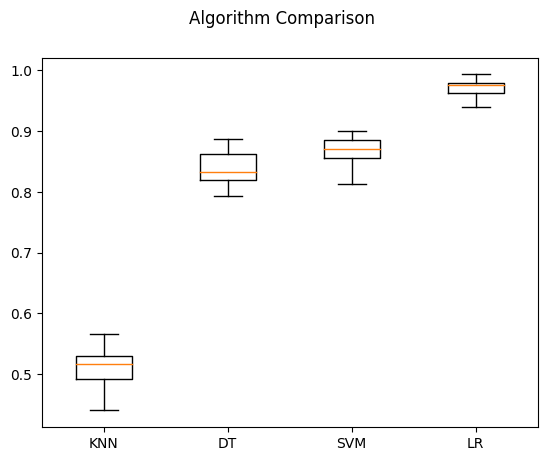

In [ ]:
from sklearn import model_selection
# Prepare configuration for cross-validation test harness
seed = 7

# Prepare models
models = []
models.append(('KNN', knn))
models.append(('DT', decision_tree))
models.append(('SVM', svm))
models.append(('LR', logreg))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()